# Global minimum search

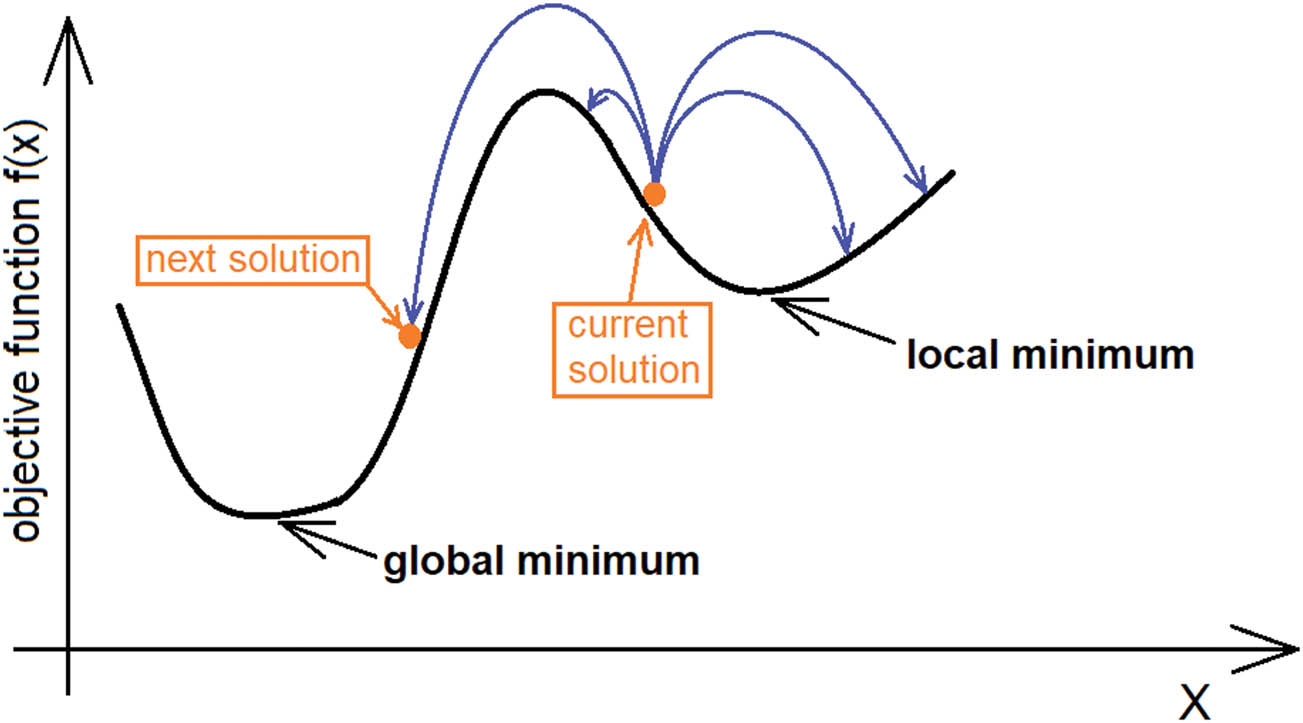

https://www.degruyterbrill.com/document/doi/10.1515/geo-2020-0038/html?srsltid=AfmBOortf68DLIK_kTyyLwvbu5qyragz2snLzh7r6CQ8Bmvul6Sv0dEM

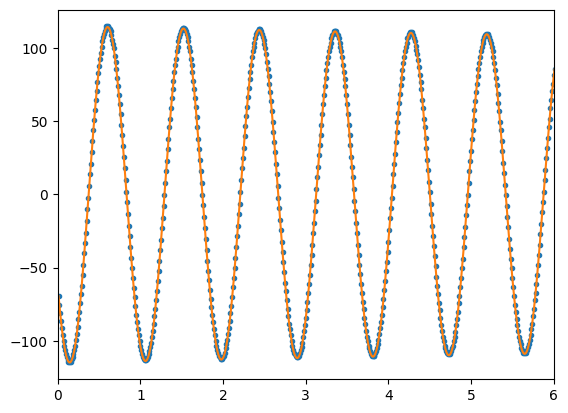

In [1]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO/data5000.txt'

t, xb = np.genfromtxt(url, skip_header=1, usecols=[1,3], delimiter='\t').T

xb -= np.mean(xb)

data = xb

# generate experimental uncertainties
uncertainty = 1 # one count, if x in counts

def model(params, t):
    amp = params['amplitude']
    phaseshift = params['phase']
    freq = params['frequency']
    tau = params['tau']
    return amp * np.exp(-t/2/tau) * np.sin(t*freq + phaseshift)

def residual(params, t, data, uncertainty):
    return (data - model(params, t)) / uncertainty


params = Parameters()
params.add('amplitude', value=10, min=0, max=200)
params.add('tau', value=50, min=1, max=100)
params.add('phase', value=0.2, min=-np.pi, max=np.pi)
params.add('frequency', value=3.0, min=1, max=10)

out = minimize(residual, params, args=(t, data, uncertainty), method='dual_annealing')
y_expected = model(out.params, t)
plt.plot(t, data,'.')
plt.plot(t, y_expected)
plt.xlim(0, 6)
out

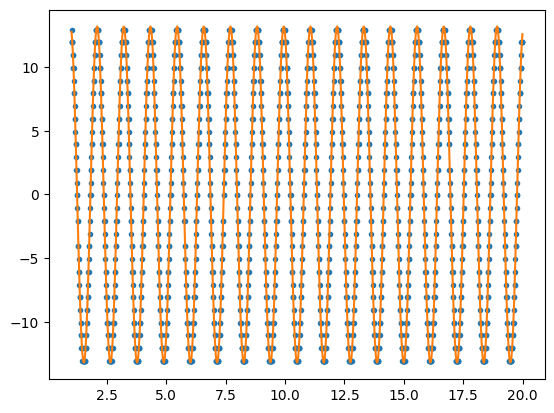

In [2]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO//beats/beats_under.txt'

t, xa = np.genfromtxt(url, skip_header=1, usecols=[1,2], delimiter='\t').T

xa -= np.mean(xa)
mask = (t > 1)  & (t< 20)
t = t[mask]
xa = xa[mask]

data = xa

def model(params, t):
    amp = params['amplitude']
    phaseshift = params['phase']
    freq = params['frequency']
    return amp  * np.sin(t*freq + phaseshift)

params = Parameters()
params.add('amplitude', value=10, min=0, max=200)
params.add('phase', value=0.2, min=-np.pi, max=np.pi)
params.add('frequency', value=3.0, min=1, max=10)


out = minimize(residual, params, args=(t, data, uncertainty), method='dual_annealing')
y_expected = model(out.params, t)
plt.plot(t, data,'.')
plt.plot(t, y_expected)
#plt.xlim(0, 6)
out

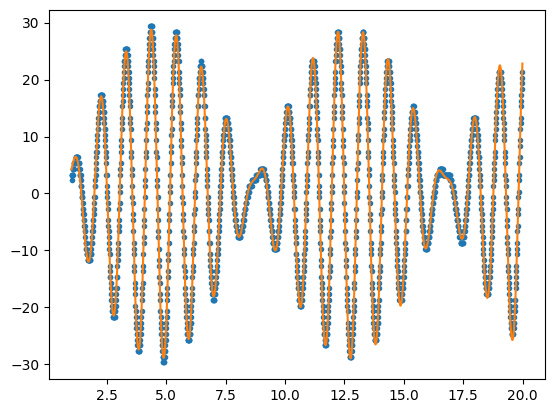

In [3]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO//beats/beats_under.txt'

t, xb = np.genfromtxt(url, skip_header=1, usecols=[1,3], delimiter='\t').T

xb -= np.mean(xb)
mask = (t > 1)  & (t< 20)
t = t[mask]
xb = xb[mask]

data = xb

def model(params, t):
    amp1 = params['amp1']
    phase1 = params['phase1']
    freq1 = params['freq1']
    amp2 = params['amp2']
    phase2 = params['phase2']
    freq2 = params['freq2']
    return amp1  * np.sin(t*freq1 + phase1) + amp2  * np.sin(t*freq2 + phase2)


params = Parameters()
params.add('amp1', value=1, min=0, max=20)
params.add('phase1', value=0.0, min=-np.pi, max=np.pi, vary=True)
params.add('freq1', value=1, min=1, max=10)
params.add('amp2', value=2,  min=0, max=20)
params.add('phase2', value=0.0, min=-np.pi, max=np.pi)
params.add('freq2', value=1, min=1, max=10)

#out = minimize(residual, params, args=(t, data, uncertainty), method='differential_evolution')
out = minimize(residual, params, args=(t, data, uncertainty), method='dual_annealing')
y_expected = model(out.params, t)
plt.plot(t, data,'.')
plt.plot(t, y_expected)
out

# Local minimum

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


[115.06359165   6.84954615  52.09146248  -2.56152683   0.70341999]


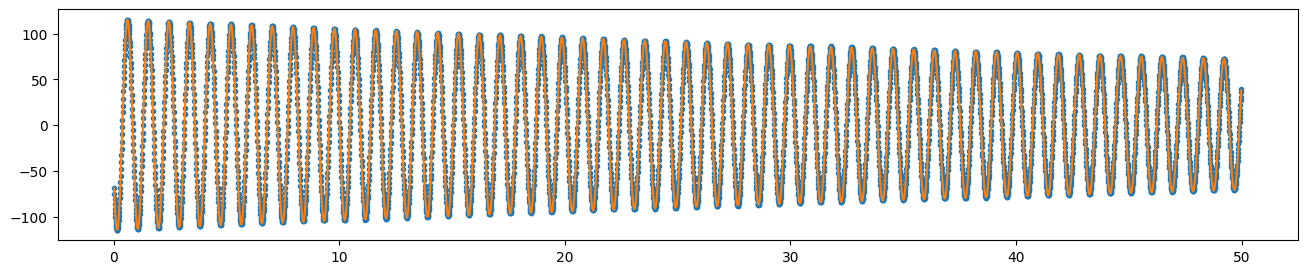

In [5]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO/data5000.txt'

t, xa = np.genfromtxt(url, skip_header=1, usecols=[1,3], delimiter='\t').T
fig, ax = plt.subplots(figsize=(16,3))
Tmax = 50
mask = t < Tmax
t = t[mask]
xa = xa[mask]


def harmonic(x, amp, omega, tau, phi, offset):
  return amp * np.exp(-t/2/tau)*np.sin(omega * x + phi) +offset

initial = [100,  6.5, 50, 0,  0]
#x_scale = [100,  1,   50, 1,  1]
bounds = (
    [ 50,  6.0, 10, -np.pi , -50],
    [ 130,  7.0, 200, np.pi, 50 ]
)

#popt, pcov = curve_fit(harmonic, t, a, p0=initial, bounds=bounds, x_scale=x_scale)
popt, pcov = curve_fit(harmonic, t, xa, p0=initial, bounds=bounds)
print(popt)
y_expected = harmonic(t, *popt)
plt.plot(t, xa,'.')
plt.plot(t, y_expected)

[-16.03781579   5.60082633  -0.75042289  12.92967976   6.38061955
  -1.25873162]


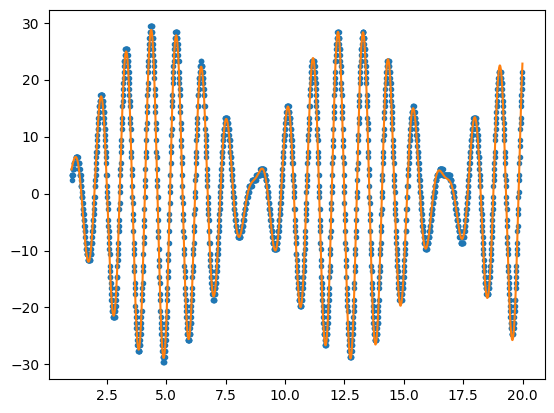

In [6]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab1_HO//beats/beats_under.txt'

t, xb = np.genfromtxt(url, skip_header=1, usecols=[1,3], delimiter='\t').T

xb -= np.mean(xb)
mask = (t > 1)  & (t< 20)
t = t[mask]
xb = xb[mask]
xb -= np.mean(xb)


def harmonic2(t, amp1, freq1, phase1, amp2, freq2, phase2):
    return amp1  * np.sin(t*freq1 + phase1) + amp2  * np.sin(t*freq2 + phase2)

initial = [10, 5.6, 0, 20, 6.20, 0]
popt, pcov = curve_fit(harmonic2, t, xb, p0=initial)
print(popt)
y_expected = harmonic2(t, *popt)
plt.plot(t, xb,'.')
plt.plot(t, y_expected)

[15.72921085  5.59867302  2.27767266  3.13422305  5.86683092  0.95122052]


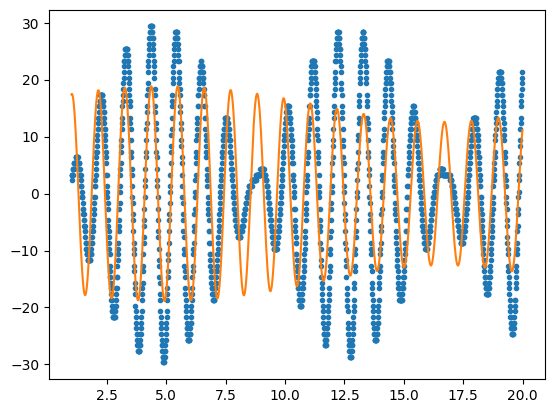

In [7]:
initial = [10, 5.6, 0, 20, 6.0, 0]
popt, pcov = curve_fit(harmonic2, t, xb, p0=initial)
print(popt)
y_expected = harmonic2(t, *popt)
plt.plot(t, xb,'.')
plt.plot(t, y_expected)